## Overview The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Dataset Analysis
Exmaple of a picture of each classe.
(paper, glass, plastic)

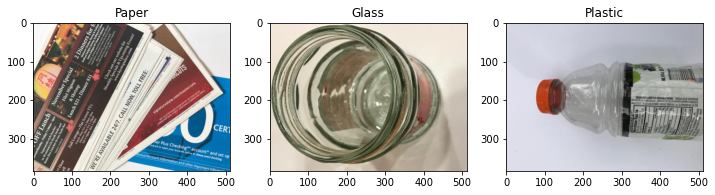

In [2]:
paper = "./archive/garbage_classification/images/paper/paper100.jpg"
glass = "./archive/garbage_classification/images/glass/glass21.jpg"
plastic = "./archive/garbage_classification/images/plastic/plastic21.jpg"

img_paper = Image.open(paper)
img_glass = Image.open(glass)
img_plastic = Image.open(plastic)

plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(img_paper)
plt.axis("on")
plt.title("Paper")

plt.subplot(1, 3, 2)
plt.imshow(img_glass)
plt.axis("on")
plt.title("Glass")

plt.subplot(1, 3, 3)
plt.imshow(img_plastic)
plt.axis("on")
plt.title("Plastic")
plt.show()

Picture's path for each classe.

In [3]:
glass= "./archive/garbage_classification/images/glass/"
paper= "./archive/garbage_classification/images/paper/"
plastic=  "./archive/garbage_classification/images/plastic/"

dict = {}
dict[0] = 'glass'
dict[1] = 'plastic'
dict[2] = 'paper'

## Data Preparation

The dataset is not balanced. Using the data as it is is will probably show wrong results and we may suffer of Overfitting. This means that we need to do some pre processing in order to be able to make conclusions.

Glass: 31.761 % 
Paper: 37.676 % 
Plastic: 30.563 % 


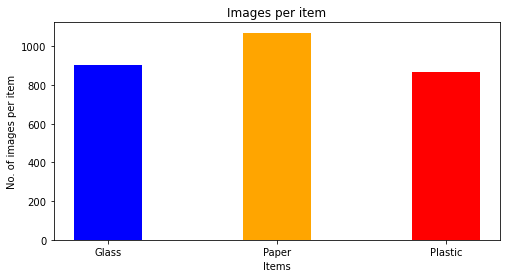

In [4]:
glass_items=902
paper_items=1070
plastic_items=868

print('Glass:', round(glass_items/(glass_items+paper_items+plastic_items) * 100,3), '% ')
print('Paper:', round(paper_items/(glass_items+paper_items+plastic_items) * 100,3),'% ')
print('Plastic:', round(plastic_items/(glass_items+paper_items+plastic_items) * 100,3),'% ')

data = {'Glass': glass_items, 'Paper': paper_items, 'Plastic': plastic_items}
items = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 4))

plt.bar(items[0], values[0], color ='blue',width = 0.4)
plt.bar(items[1], values[1], color ='orange',width = 0.4)
plt.bar(items[2], values[2], color ='red',width = 0.4)

plt.xlabel("Items")
plt.ylabel("No. of images per item")
plt.title("Images per item")
plt.show()

In order of the results above we decided to balance the dataset and only use the same number of images of each classe.

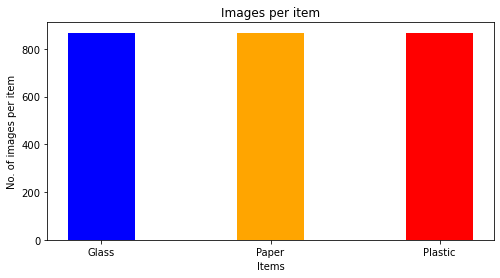

In [25]:
num_images=868 # 868 beacause it is the lowest number from the three classes

data = {'Glass': num_images, 'Paper': num_images, 'Plastic': num_images}
items = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 4))

plt.bar(items[0], values[0], color ='blue',width = 0.4)
plt.bar(items[1], values[1], color ='orange',width = 0.4)
plt.bar(items[2], values[2], color ='red',width = 0.4)

plt.xlabel("Items")
plt.ylabel("No. of images per item")
plt.title("Images per item")
plt.show()

In order to make more easy and lower the number of features we decided to resize each image, beacuse initially the lower size was 512*384 which leads to a higher number of features.

In [6]:
img_size = 32
train_images = []

for p in range(1,num_images+1):
    image = Image.open(glass+"glass"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

for p in range(1,num_images+1):
    image = Image.open(plastic+"plastic"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

for p in range(1,num_images+1):
    image = Image.open(paper+"paper"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

## Data Normalization

In [7]:
X = np.empty((num_images*3, img_size* img_size*3))
index = 0
for pl in train_images:
    # Normalize pixel values
    pixels = asarray(pl)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    X[index] = pixels.reshape(img_size * img_size*3)
    index += 1
g = np.zeros(num_images)
m = np.ones(num_images)
p = np.empty(num_images)
p.fill(2)
y = np.concatenate((g, m, p), axis=0).reshape(X.shape[0], 1)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2604, 3072)
y shape:  (2604, 1)


Splitting the dataset into training subset and testing subset, using 20% fo the dataset to test

X train: (2083, 3072)
y train: (2083,)
X test: (521, 3072)
y test: (521,)


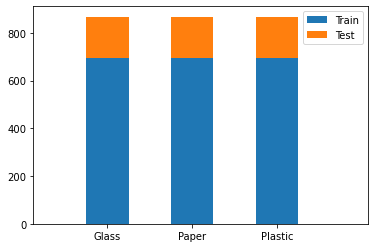

In [33]:

y = y.ravel()

# extract train sub-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling of data
st_x = StandardScaler()    
X_train = st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test) 

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

 
labels = ['Glass', 'Paper', 'Plastic']
y1 = [695, 695, 695]
y2 = [173, 173, 173]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, y1, width, label='Train')
ax.bar(labels, y2, width, bottom=y1,
       label='Test')

#ax.set_ylabel('')
#ax.set_title('')
ax.legend()
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.5, xmax + 0.7)

plt.show()